# **Phân tích số tiền sao kê ủng hộ đợt bão lũ**




In [2]:
## Import thư viện
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

In [3]:
## Import dữ liệu
drive.mount('/content/drive')
df=pd.read_csv('/content/drive/MyDrive/chuyen_khoan.csv')

Mounted at /content/drive


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200347 entries, 0 to 200346
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    200347 non-null  object
 1   credit  200347 non-null  int64 
 2   detail  200347 non-null  object
dtypes: int64(1), object(2)
memory usage: 4.6+ MB


In [5]:
## Tổng số tiền quyên góp
total_credit=df['credit'].sum()
print(total_credit)

135080839728


In [6]:
## Đếm số lượt giao dịch
transaction_count = df['credit'].count()
print(transaction_count)

200347


In [7]:
## Mức quyên góp trung bình
median_credit=df['credit'].mean()
print(median_credit)

674234.4019526122


In [8]:
## Mức quyên góp trung vị
average_credit=df['credit'].median()
print(average_credit)

200000.0


In [9]:
## Số tiền quyên góp lớn nhất
max_credit=df['credit'].max()
print(max_credit)

1000000000


In [10]:
max_transaction = df[df['credit'] == max_credit]
pd.set_option('display.max_colwidth', None)
print(max_transaction)

             date      credit  \
59445  10/09/2024  1000000000   

                                                                                                                                                              detail  
59445  SHGD:10004067.DD:240910.BO:VAN PHONG HOC VIEN CHINH TRI QUOC GIA HC.Remark:HV CTQG HOCHIMINH UNG HO LE PHATDONG UNG HO DONGBAO BI THIET HAI DO BAO SO 3GAY RA  


In [11]:
## Xem phân phối số tiền chuyển khoản

## Tạo thêm cột phân loại số tiền
def categorize_amount(amount):
    if amount < 100000:
        return 'Dưới 100k'
    elif amount < 1000000:
        return '100k - 1tr'
    elif amount < 10000000:
        return '1tr - 10tr'
    elif amount < 100000000:
        return '10tr - 100tr'
    else:
        return 'Trên 100tr'

df['category'] = df['credit'].apply(categorize_amount)


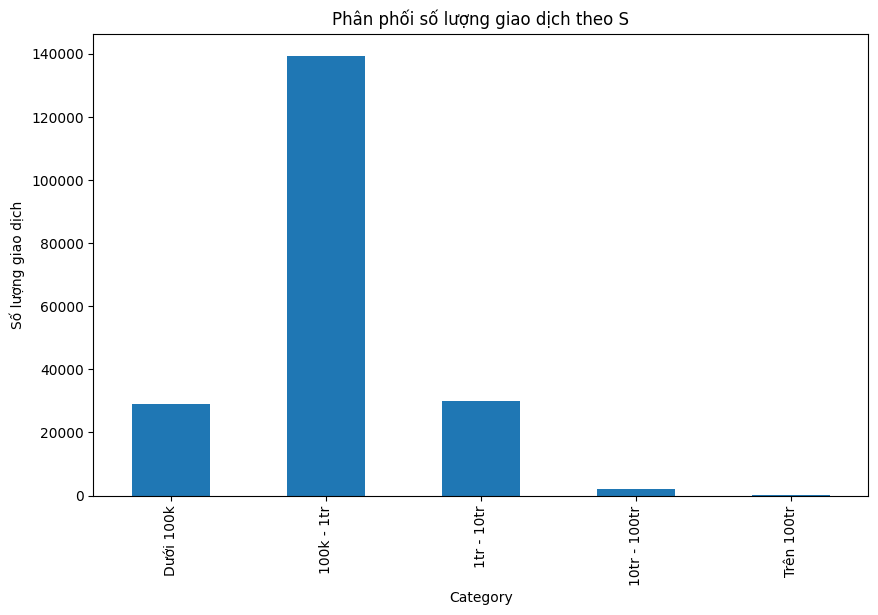

In [12]:
## Tạo biểu đồ
order = ['Dưới 100k', '100k - 1tr', '1tr - 10tr', '10tr - 100tr', 'Trên 100tr']
counts = df['category'].value_counts().reindex(order)
plt.figure(figsize=(10,6))
counts.plot(kind='bar')
plt.title('Phân phối số lượng giao dịch theo S')
plt.xlabel('Category')
plt.ylabel('Số lượng giao dịch')
plt.show()

In [13]:
credit_modified=df['credit']/1000000
df['credit_modified']=credit_modified

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, '01/09/2024'),
  Text(1, 0, '02/09/2024'),
  Text(2, 0, '03/09/2024'),
  Text(3, 0, '04/09/2024'),
  Text(4, 0, '05/09/2024'),
  Text(5, 0, '06/09/2024'),
  Text(6, 0, '07/09/2024'),
  Text(7, 0, '08/09/2024'),
  Text(8, 0, '09/09/2024'),
  Text(9, 0, '10/09/2024')])

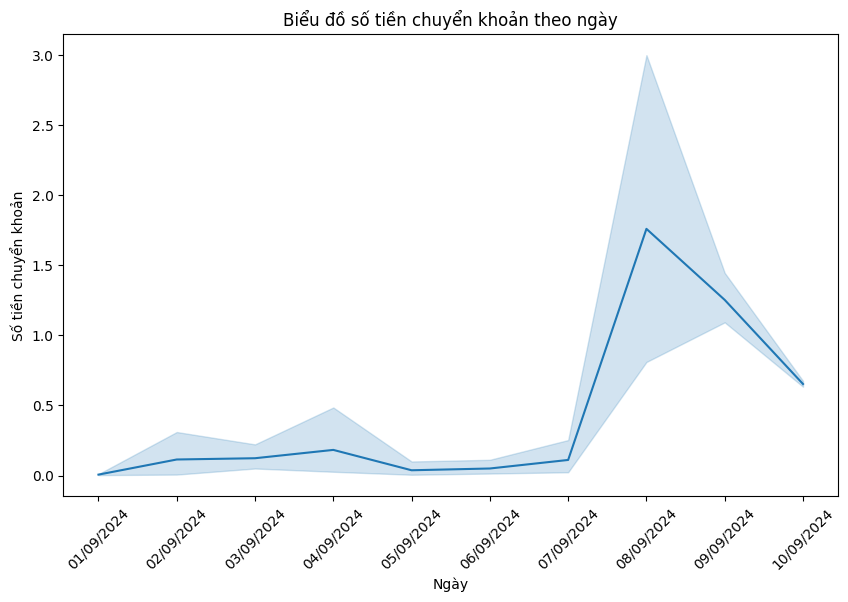

In [21]:
## Biểu đồ số tiền chuyển khoản theo thời gian
plt.figure(figsize=(10,6))
sns.lineplot(df,x='date',y='credit_modified')
plt.title('Biểu đồ số tiền chuyển khoản theo ngày')
plt.xlabel('Ngày')
plt.ylabel('Số tiền chuyển khoản')
plt.xticks(rotation=45)

In [15]:
## Phân tích theo nội dung chuyển khoản
## Lấy các từ khóa phổ biến nhất trong nội dung chuyển khoản
from collections import Counter
import re
# Danh sách stopwords tiếng Việt không dấu
vietnamese_stopwords = set([
    "va", "cua", "cac", "co", "la", "duoc", "trong", "da", "cho", "nhung",
    "voi", "nay", "de", "ve", "nhu", "tu", "con", "bi", "vi", "rang",
    "tai", "theo", "khi", "nhung", "phai", "neu", "cung", "len", "den", "tung",
    "rat", "thi", "dang", "nen", "lam", "sau", "hay", "tren", "boi", "vao",
    "ra", "toi", "them", "do", "ai", "ma", "lai", "van", "moi", "ca"
])

def create_bigrams(words):
    return [' '.join(words[i:i+2]) for i in range(len(words)-1)]

def keywords(df, content_column, top_n=10):
    # Hàm để tiền xử lý văn bản
    def preprocess(text):
        # Loại bỏ các ký tự đặc biệt và chuyển đổi thành chữ thường
        text = re.sub(r'[^\w\s]', '', text.lower())
        # Tách các từ và loại bỏ stopwords
        return [word for word in text.split() if word not in vietnamese_stopwords]

    # Tiền xử lý và tạo bigrams cho mỗi nội dung
    all_bigrams = []
    for content in df[content_column].astype(str):
        words = preprocess(content)
        all_bigrams.extend(create_bigrams(words))

    # Đếm tần suất của bigrams
    bigram_counts = Counter(all_bigrams)

    # Lấy top N bigrams phổ biến nhất
    top_bigrams = bigram_counts.most_common(top_n)

    return top_bigrams

In [16]:
# Top 10 từ khóa trong nội dung chuyển khoản
top_keyword=keywords(df,'detail',10)
print(top_keyword)

[('ung ho', 61617), ('dong bao', 60951), ('cuu tro', 49842), ('chuyen tien', 49424), ('ho dong', 45728), ('to quoc', 43162), ('mat tran', 42909), ('tran to', 42903), ('ban cuu', 42427), ('tro tw', 42345)]


Text(0, 0.5, 'Tần suất')

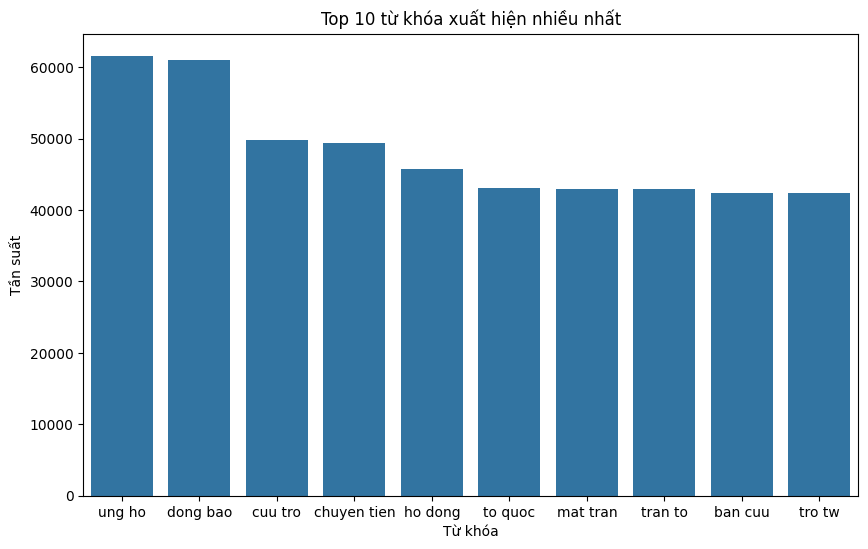

In [17]:
## Tạo biểu đồ top các từ khóa xuất hiện nhiều nhất
top_keyword=keywords(df,'detail',10)
print(top_keyword)
plt.figure(figsize=(10,6))
sns.barplot(x=[keyword[0] for keyword in top_keyword],y=[keyword[1] for keyword in top_keyword])
plt.title('Top 10 từ khóa xuất hiện nhiều nhất')
plt.xlabel('Từ khóa')
plt.ylabel('Tần suất')

In [18]:
def classify_donor(content):
    # Danh sách từ khóa gợi ý về tập thể
    collective_keywords = ['cty', 'congty', 'company', 'corp', 'tap doan', 'tapdoan', 'to chuc', 'tochuc', 'nhom', 'group','tap the','tapthe','chi doan','chidoan','trung tam','trungtam','lien doan','liendoan','anh em','anhem','cong ty','media','hoi','club']

    # Chuyển nội dung về chữ thường và loại bỏ dấu cách thừa
    content = ' '.join(content.lower().split())

    # Kiểm tra xem có từ khóa nào của tập thể xuất hiện không
    if any(keyword in content for keyword in collective_keywords):
        return 'Tập thể'

    # Mặc định là cá nhân
    return 'Cá nhân'

def analyze_donations(df, content_column, amount_column, top_n=10):
    def preprocess(text):
        text = re.sub(r'[^\w\s]', '', text.lower())
        return [word for word in text.split() if word not in vietnamese_stopwords]

    all_bigrams = []
    donor_types = {'Tập thể': 0, 'Cá nhân': 0}
    total_amount = {'Tập thể': 0, 'Cá nhân': 0}

    for content, amount in zip(df[content_column].astype(str), df[amount_column]):
        words = preprocess(content)
        all_bigrams.extend(create_bigrams(words))

        donor_type = classify_donor(content)
        donor_types[donor_type] += 1
        total_amount[donor_type] += amount

    bigram_counts = Counter(all_bigrams)
    top_bigrams = bigram_counts.most_common(top_n)

    return top_bigrams, donor_types, total_amount

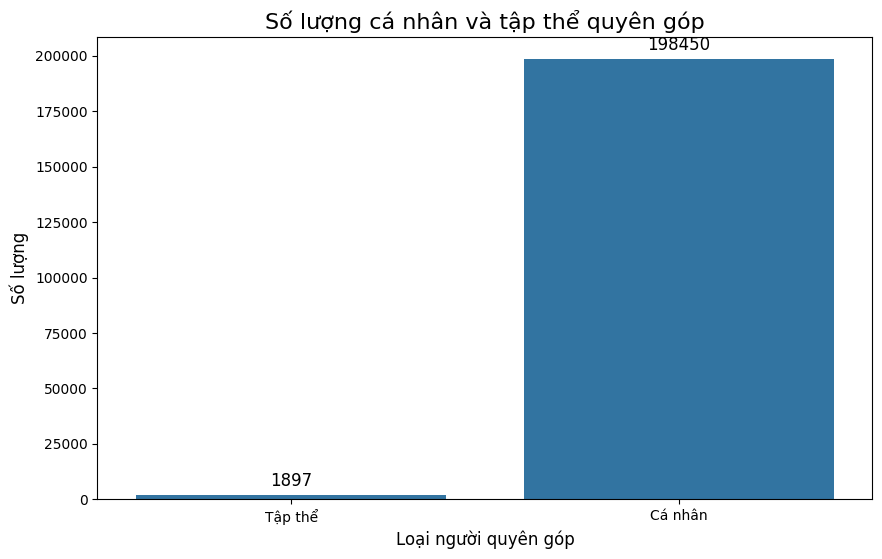

In [19]:
## Đếm số lượng tập thể và cá nhân
plt.figure(figsize=(10,6))
top_keyword, donor_types, total_amount = analyze_donations(df, 'detail', 'credit')
ax = sns.barplot(x=list(donor_types.keys()), y=list(donor_types.values()))
ax.set_title('Số lượng cá nhân và tập thể quyên góp', fontsize=16)
ax.set_xlabel('Loại người quyên góp', fontsize=12)
ax.set_ylabel('Số lượng', fontsize=12)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black',
                xytext=(0, 10), textcoords='offset points')

plt.show()

Text(0, 0.5, 'Tổng số tiền')

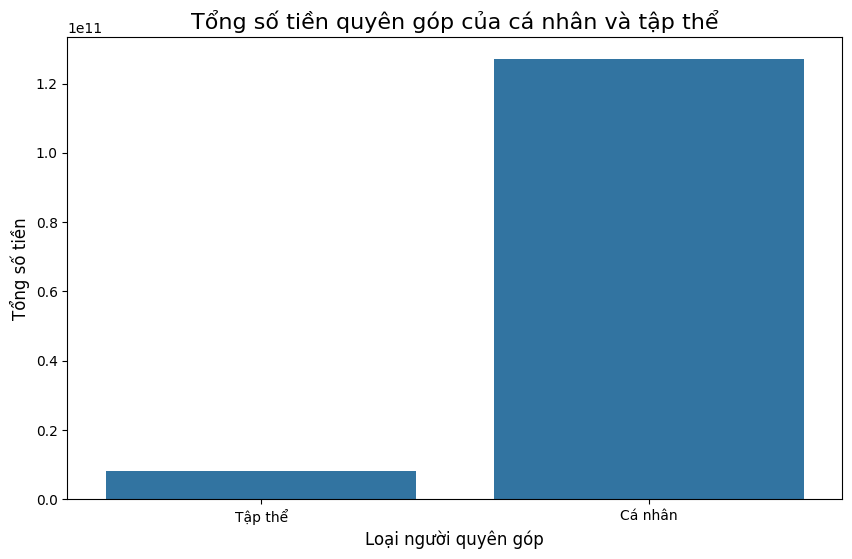

In [20]:
## Số tiền quyên góp của tập thể và cá nhân
plt.figure(figsize=(10,6))
ax = sns.barplot(x=list(total_amount.keys()), y=list(total_amount.values()))
ax.set_title('Tổng số tiền quyên góp của cá nhân và tập thể', fontsize=16)
ax.set_xlabel('Loại người quyên góp', fontsize=12)
ax.set_ylabel('Tổng số tiền', fontsize=12)
